<a href="https://colab.research.google.com/github/LaryssaCunha/on29-python-s10-pandas-numpy-II/blob/main/Exerc%C3%ADcio_casa_semana10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atividade de casa:** Utilizar a tabela de dados do clima de seu estado (que pode ser baixada aqui) crie 3 gráficos com os dados fornecidos pela tabela, os gráficos podem ser de qualquer dado, qualquer tipo e de qualquer amostragem.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('data_sample_RJ.csv', sep=';')
df

,Data,Hora UTC,PRECIPITAO TOTAL. HORARIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB),PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m2),TEMPERATURA DO AR - BULBO SECO. HORARIA (C),TEMPERATURA DO PONTO DE ORVALHO (C),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C),...,VENTO. RAJADA MAXIMA (m/s),VENTO. VELOCIDADE HORARIA (m/s),REGIAO,UF,ESTACAO,CODIGO (WMO),LATITUDE,LONGITUDE,ALTITUDE,DATA DE FUNDACAO
0,2021/10/05,1800 UTC,0.0,1012.9,1012.9,1012.7,441.0,19.8,19.0,20.3,...,7.9,4.1,SE,RJ,RIO DE JANEIRO - FORTE DE COPACABANA,A652,-22.988333,-43.190556,25.59,18/05/07
1,2020/10/09,0400 UTC,0.0,1011.6,1012.5,1011.6,NaN,22.6,21.3,22.9,...,2.5,0.8,SE,RJ,PARATI,A619,-23.223611,-44.726944,3.00,19/11/06
2,2021/10/01,2300 UTC,0.0,NaN,NaN,NaN,NaN,21.0,20.3,21.1,...,2.4,0.7,SE,RJ,SILVA JARDIM,A659,-22.645833,-42.415556,19.00,28/08/15
3,2021/03/15,2200 UTC,0.0,1008.4,1008.4,1007.9,1.3,26.2,22.6,26.9,...,5.6,1.6,SE,RJ,SEROPEDICA-ECOLOGIA AGRICOLA,A601,-22.757778,-43.684722,35.00,24/05/00
4,2021/04/26,1600 UTC,0.0,1011.2,1011.7,1011.2,2810.2,26.1,NaN,26.9,...,7.8,4.2,SE,RJ,CAMPOS DOS GOYTACAZES - SAO TOME,A620,-22.041667,-41.051667,7.00,13/06/08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2020/03/26,0500 UTC,0.0,1016.4,1017.0,1016.4,NaN,20.3,18.9,21.0,...,1.4,0.2,SE,RJ,NITEROI,A627,-22.867389,-43.102056,6.00,13/07/18
99996,2021/09/23,1600 UTC,0.0,1014.0,1015.0,1014.0,3404.0,26.3,8.5,26.3,...,6.7,3.3,SE,RJ,CAMBUCI,A604,-21.587500,-41.958333,46.00,20/11/02
99997,2022/07/29,0600 UTC,0.0,1008.4,1008.6,1008.3,NaN,18.3,15.1,18.5,...,5.1,2.1,SE,RJ,PARATY,A619,-23.223611,-44.726944,3.00,19/11/06
99998,2022/11/30,1200 UTC,1.6,1007.9,1007.9,1007.5,583.0,22.8,21.4,22.9,...,15.9,8.3,SE,RJ,ARRAIAL DO CABO,A606,-22.975278,-42.021389,5.00,22/09/06


In [9]:
df.dtypes #faço isso pra saber quaois dados e que tipos de dados tenho na tabela

Data                                                      object
Hora UTC                                                  object
PRECIPITAO TOTAL. HORARIO (mm)                           float64
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB)    float64
PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          float64
PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         float64
RADIACAO GLOBAL (Kj/m2)                                  float64
TEMPERATURA DO AR - BULBO SECO. HORARIA (C)              float64
TEMPERATURA DO PONTO DE ORVALHO (C)                      float64
TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C)                float64
TEMPERATURA MINIMA NA HORA ANT. (AUT) (C)                float64
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C)          float64
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (C)          float64
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 float64
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 float64
UMIDADE RELATIVA DO AR. H

**1º Gráfico:** Precipitação por horário (x = hora, y = valor da precipitação)

In [10]:
#tratar as horas pra formato xx:xx
#agrupar pela hora e fazer a média da precipitação

In [11]:
df['Hora'] = df['Hora UTC'].str.replace('00 UTC', ':00')

In [12]:
df['Hora']

0        18:00
1        04:00
2        23:00
3        22:00
4        16:00
         ...  
99995    05:00
99996    16:00
99997    06:00
99998    12:00
99999    11:00
Name: Hora, Length: 100000, dtype: object

In [13]:
precipitacao_hora = df.groupby(['Hora'])['PRECIPITAO TOTAL. HORARIO (mm)'].mean().to_numpy()

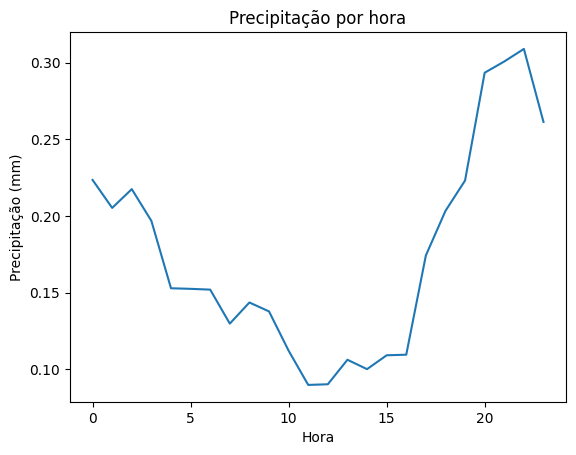

In [16]:
plt.plot(precipitacao_hora)
plt.xlabel('Hora')
plt.ylabel('Precipitação (mm)')
plt.title('Precipitação por hora')
plt.show()

**2º Gráfico** - Média da temperatura do ponto de orvalho por hora, x = temperatura em celsius, y = a hora.

In [17]:
ponto_orvalho_hora = df.groupby(['Hora'])['TEMPERATURA DO PONTO DE ORVALHO (C)'].mean().to_numpy()

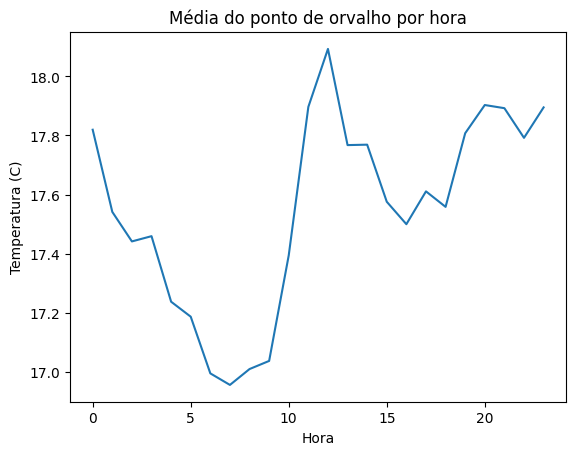

In [23]:
plt.plot(ponto_orvalho_hora)
plt.xlabel('Hora')
plt.ylabel('Temperatura (C)')
plt.title('Média do ponto de orvalho por hora')
plt.show()

**3º Gráfico:** Média da temperatura mínima e média da temperatura máxima por hora. - x = hora, y = temperatura. ai usar temperatura máxima e mínima. cores diferentes pra cada um.


In [24]:
temperatura_maxima_hora = df.groupby(['Hora'])['TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C)'].mean().to_numpy()

In [25]:
temperatura_minima_hora = df.groupby(['Hora'])['TEMPERATURA MINIMA NA HORA ANT. (AUT) (C)'].mean().to_numpy()

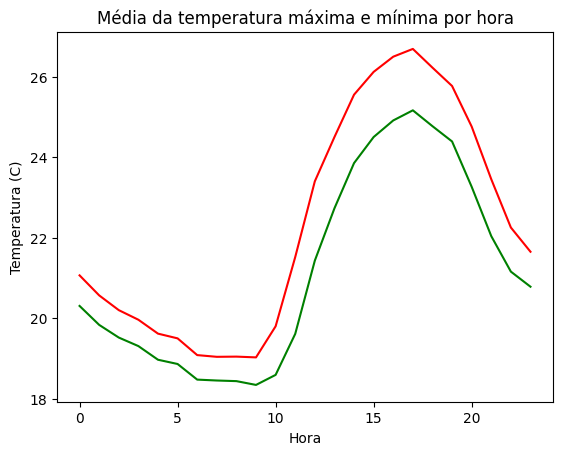

In [34]:
plt.plot(temperatura_maxima_hora, color = 'r')
plt.plot(temperatura_minima_hora, color = 'g')
plt.xlabel('Hora')
plt.ylabel('Temperatura (C)')
plt.title('Média da temperatura máxima e mínima por hora')
plt.show()